# Лабораторное занятие 6. Графы

source: https://habr.com/ru/company/ruvds/blog/705368/

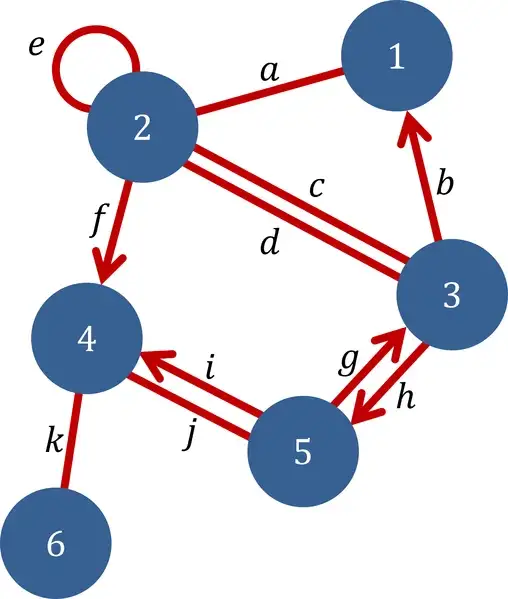

Граф – это математическая структура данных, представляющая собой множество связанных элементов. Поскольку графы, по своей сути, являются очень гибкими и позволяют сохранять информацию в знакомой и удобной для восприятия форме, они всегда активно использовались в компьютерной науке и сфере технологий. С появлением же машинного и глубокого обучения, графы обрели ещё бо́льшую популярность, создав новое направление — машинное обучение на графах.

## Практическое применение

### Задача коммивояжера

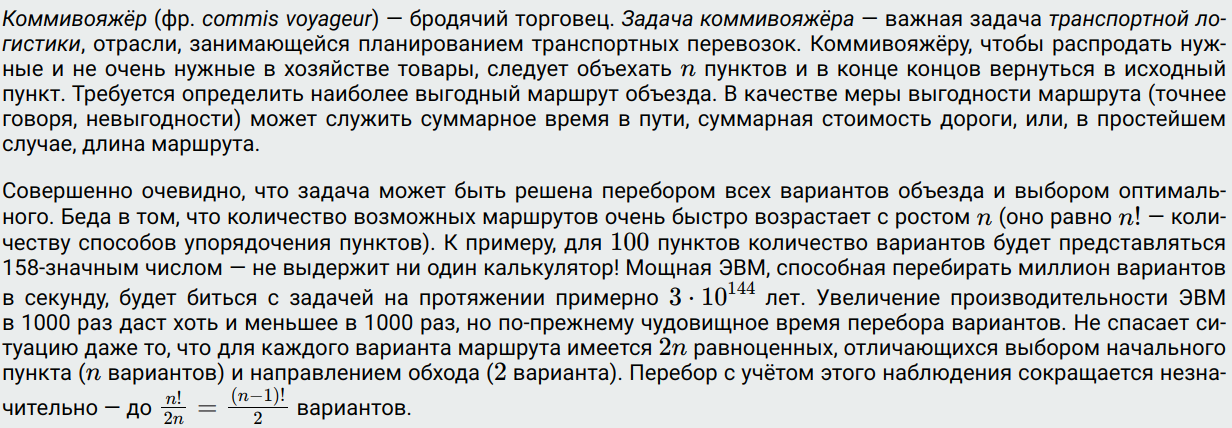
source: http://mech.math.msu.su/~shvetz/54/inf/perl-examples/PerlExamples_CommisVoyageur.xhtml

![ChessUrl](https://hsto.org/webt/2x/kj/ve/2xkjvey3ymegjvyhvrlvq1hk_wm.gif "chess")
Brute-force approach

### Примеры задач на графах:
 - на уровне узлов (например, классификация узлов) – присваивание метки каждому узлу в графе. Пример задачи: поделить группу людей на два кластера, исходя из информации об их связях друг с другом.
 - на уровне рёбер (например, прогнозирование рёбер) – подразумевают прогнозирование наличия ребра между двух узлов или, чаще всего, типа ребра (графы, имеющие несколько типов рёбер, называются мультиграфами).
 
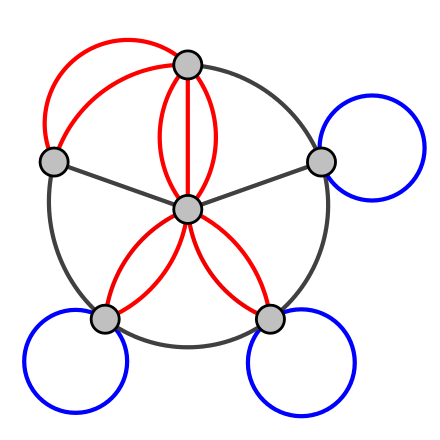
Мультиграф с кратными рёбрами (красные) и петлями (синие).

 - на уровне графов. Например, классификация графов, генерация графов. Это направление особенно полезно для биологии и химии, поскольку строеные молекул можно представить в графовом виде.

### Терминология

 - __Графом__ называется конечное множество вершин и множество ребер. Каждому ребру сопоставлены две вершины – концы ребра.
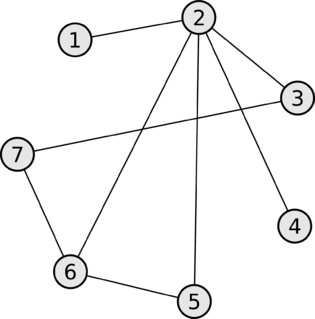
 - __Ориентированный граф__ – граф, у ребер которого одна вершина считается начальной, а другая – конечной.
 - Если некоторое ребро $u$ соединяет две вершины $A$ и $B$ графа, то говорят, что ребро $u$ __инцидентно__ вершинам $A$ и $B$, а вершины $A$ и $B$ в свою очередь __инцидентны__ ребру $u$. 
 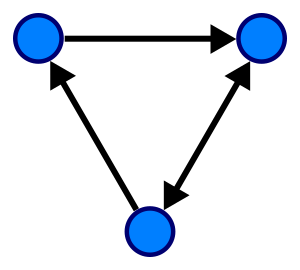
 - Вершины, соединенные ребром, называются __смежными__.
 - Ребра называются __кратными__, если они соединяют одну и ту же пару вершин (а в случае ориентированного графа – если у них совпадают начала и концы). 
 - Ребро называется __петлей__, если у него совпадают начало и конец. 
 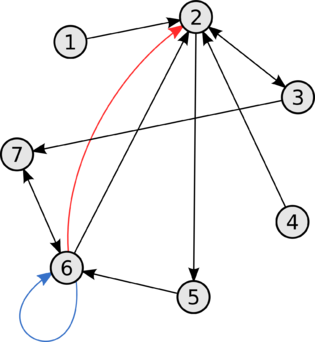
 - Графы без петель и кратных ребер называются __простыми__.
 - __Степенью вершины__ в неориентированном графе называется число инцидентных данной вершине ребер (при этом петля считается два раза, то есть степень - это количество «концов» ребер, входящих в вершину). Довольно очевидно, что _сумма степеней всех вершин равна удвоенному числу ребер в графе_. Отсюда можно посчитать максимальное число ребер в простом графе - если у графа $n$ вершин, то степень каждой из них равна $n-1$, а, значит, число ребер есть $\frac{n(n-1)}{2}$. 
 - Граф, в котором любые две вершины соединены одним ребром, называется __полным графом__.

__N.B.__ Также легко заметить следующий факт – в любом графе число вершин нечетной степени – четно. Этот факт называется _«леммой о рукопожатиях»_ – в любой компании число людей, сделавших нечетное число рукопожатий всегда четно.


 - __Путем на графе__ называется последовательность ребер $u_1, u_2,..., u_m$ в которой конец одного ребра является началом следующего ребра. Начало первого ребра называется началом пути, конец последнего ребра - концом пути. Если начало и конец пути совпадают, то такой путь называется __циклом__.

 - Путь, который проходит через каждую вершину не более одного раза называется __простым путем__. Аналогично определяется __простой цикл__.

 - Граф называется __связным__, если между любыми двумя его вершинами есть путь. Если граф __несвязный__, то его можно разбить на несколько частей (подграфов), каждая из которых будет связной. Такие части называются __компонентами связности__. Возможно, что некоторые компоненты связности будут состоять всего лишь из одной вершины.
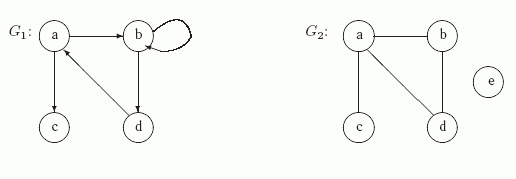
Понятно, что в графе из $n$ вершин может быть от $1$ до $n$ компонент связности.

## Способы хранения графа

Представление графов в памяти — это способ хранения информации о ребрах графа, позволяющий решать следующие задачи:

Для двух данных вершин $u$ и $v$ проверить, соединены ли вершины $u$ и $v$ ребром.
Перебрать все ребра, исходящие из данной вершины  $u$.
При этом способ хранения графов в памяти должен учитывать возможности работы с ориентированными и неориентированными графами. По умолчанию будем предполагать, что хранимый граф является простым, но можно рассмотреть вопрос и о представлении графов с петлями и кратными ребрами.

Еще источник определений: https://skysmart.ru/articles/mathematic/osnovnye-ponyatiya-teorii-grafov

## Поиск в глубину (Deep-First Search)

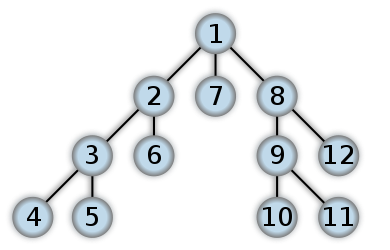

Позволяет построить обход ориентированного или неориентированного графа, при котором посещаются все вершины, доступные из начальной вершины.

Отличие поиска в глубину от поиска в ширину заключается в том, что (в случае неориентированного графа) результатом алгоритма поиска в глубину является некоторый маршрут, следуя которому можно обойти последовательно все вершины графа, доступные из начальной вершины. Этим он принципиально отличается от поиска в ширину, где одновременно обрабатывается множество вершин, в поиске в глубину в каждый момент исполнения алгоритма обрабатывается только одна вершина. С другой стороны, поиск в глубину не находит кратчайших путей, зато он применим в ситуациях, когда граф неизвестен целиком, а исследуется каким-то автоматизированным устройством.

Если же граф ориентированный, то поиск в глубину строит дерево путей из начальной вершины во все доступные из нее.

Обход в глубину можно представить себе следующим образом. Пусть исследователь находится в некотором лабиринте (графе) и он хочет обойти весь лабиринт (посетить все доступные вершины в графе). Исследователь находится в некоторой вершине и видит ребра, исходящие из этой вершины. Очевидная последовательность действий исследователя такая:

Пойти в какую-нибудь смежную вершину.
Обойти все, что доступно из этой вершины.
Вернуться в начальную вершину.
Повторить алгоритм для всех остальных вершин, смежных из начальной.
Видим, что алгоритм является рекурсивным — для обхода всего графа нужно переместиться в соседнюю вершину, после чего повторить для этой вершины алгоритм обхода. Но возникает проблема зацикливания — если из вершины A можно перейти в вершину B, то из вершины B можно перейти в вершину A и рекурсия будет бесконечной. Для борьбы с рекурсией нужно применить очень простую идею — исследователь не должен идти в ту вершину, в которой он уже был раньше, то есть которая не представляет для него интерес (считаем, что интерес для исследователя представляют только вершины, в которых он не был ранее). Итак, уточненный алгоритм может выглядеть следующим образом:

Пойти в какую-нибудь смежную вершину, не посещенную ранее.
Запустить из этой вершины алгоритм обхода в глубину
Вернуться в начальную вершину.
Повторить пункты 1-3 для всех не посещенных ранее смежных вершин.
Для реализации алгоритма понадобится отмечать, в каких вершинах был исследователь, а в каких — нет. Пометку будем делать в списке visited, где visited[i] == True для посещенных вершин, и visited[i] == false для непосещенных. Пометка «о посещении вершиных» ставится при заходе в эту вершину.

Поскольку целью обхода в глубину зачастую является построение дерева обхода в глубину, то сразу же будем хранить предшественника для каждой вершины.

source: https://foxford.ru/wiki/informatika/algoritm-poiska-v-glubinu

In [ ]:
n = 10
start = None
g = {} # create an example
visited = [False] * (n + 1)
prev = [None] * (n + 1)
def dfs(start, visited, prev, g):
    visited[start] = True
    for u in g[start]:
        if not visited[u]:
            prev[u] = start 
            dfs(u)
dfs(start, visited, prev, g)

## Задачи

Для начинающей группы задачи 1-4, для основной 1-5, для продолжающей 1-6.



1. Задан неориентированный граф. Определите является ли граф связным,  т. е. между любой парой вершин этого графа существует как минимум один путь.

Входные данные: число пар узлов и далее по строчно вводятся пары узлов.

Примеры

Ввод:

6

0 1

1 2 

2 3

3 5

4 1

Вывод: 

True

Ввод:

9

0 1

1 2

2 3

3 5

4 6

4 8

7 8

Вывод: 

False

2. Задан ориентированный граф и два узла - начальный узел и конечный узел. Проверьте достижим ли конечный узел из начального узла?

Входные данные: число узлов в графе, далее пары узлов (с направленной связью), далее на новой строке вводится начальный и через пробел конечный узел графа.

Ввод: 

6

[(0, 1), (1, 2), (2, 3), (3, 5), (4, 1)]

4 5

Вывод: 

True

Объяснение - строим путь [4 —> 1 —> 2 —> 3 —> 5]


3. Используя словарь по аэропортам вылета и прилёта найдите маршрут следования самолёта. Считайте, что вылет запланирован из каждого аэропорта, кроме конечного пункта назначения, и каждый аэропорт посещается только один раз, т.е. в маршруте нет циклов.

Ввод:
{'HKG': 'DXB', 'FRA': 'HKG', 'DEL': 'FRA'}

Вывод:

['DEL', 'FRA', 'HKG', 'DXB']

Объяснение - [HKG —> DXB, FRA —> HKG, DEL —> FRA].

4. Задан неориентированный граф. Выясните содержит ли он циклы?

Ввод: 

3

0 1

1 2

0 2

Вывод: 

True

Ввод:

5

0 1

1 2

2 3

1 4

Вывод: 

False

5. Задан список ребер взвешенного ориентированного графа, где вес каждого ребра может быть одним из x, 2x или 3x (x - положительное целое число) и две вершины - исходную и конечную. Эффективно вычислите путь с наименьшими затратами от исходной вершины до вершины назначения (конечной вершины) и верните значение наименьших затрат.

Входные данные: список узлов, где (x, y, w) означает связь между узлами x и y (от x к y) с весом w. Далее с новой строки точка отправления и точка прибытия.

Ввод: 
[(0, 1, 3), (0, 4, 1), (1, 2, 1), (1, 3, 3), (1, 4, 1), (4, 2, 2), (4, 3, 1)]

0 2

Вывод: 

3

6. Дан списко слов. Проверьте можно ли переставить отдельные слова так, чтобы они образовали цикл. Два слова, X и Y, могут быть заключены в цикл, если последний символ X совпадает с первым символом Y или наоборот.

Ввод:

[ANT, OSTRICH, DEER, TURKEY, KANGAROO, TIGER, RABBIT, RAT, TOAD, YAK, HYENA]

Вывод: 

True

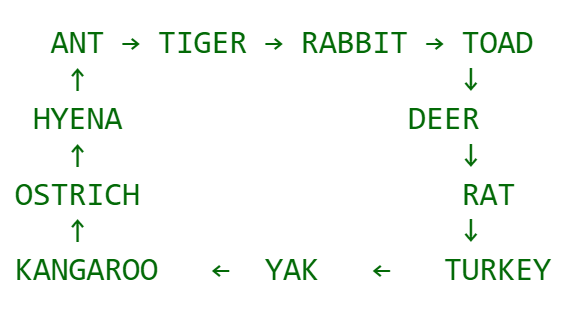



In [3]:
### Матрица смежности